In [1]:
#1. Install and Import Dependencies
#install pytorch
#install git

In [50]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111


In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch #import pytorch
from matplotlib import pyplot as plt #for rendering
import numpy as np #array transformation library
import cv2

C:\Users\Adib Razak\anaconda3\envs\YOLO recyclable 1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
#2. Load Model

In [7]:
#loading pre-trained ultralytics model from torch hub (tensorflow hub equivalent)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

Using cache found in C:\Users\Adib Razak/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-15 Python-3.8.13 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
#architecture
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [9]:
#3. Make Detections with Images

In [10]:
img = 'https://i.etsystatic.com/9171787/r/il/d5c64a/2856219187/il_794xN.2856219187_ksr2.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 447x794 1 bench, 2 bowls, 2 chairs, 3 potted plants, 1 dining table, 1 microwave, 1 oven, 1 refrigerator
Speed: 905.5ms pre-process, 3643.6ms inference, 97.1ms NMS per image at shape (1, 3, 384, 640)


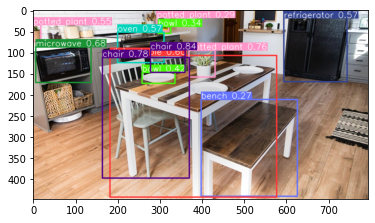

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
results.render()

[array([[[244, 242, 243],
         [245, 243, 244],
         [245, 243, 244],
         ...,
         [197, 201, 210],
         [198, 200, 212],
         [181, 183, 195]],
 
        [[245, 243, 244],
         [245, 243, 244],
         [246, 244, 245],
         ...,
         [249, 253, 255],
         [243, 245, 255],
         [228, 230, 242]],
 
        [[244, 242, 243],
         [245, 243, 244],
         [246, 244, 245],
         ...,
         [247, 251, 255],
         [232, 236, 245],
         [219, 223, 232]],
 
        ...,
 
        [[218, 168, 133],
         [219, 169, 134],
         [221, 171, 136],
         ...,
         [115,  89,  64],
         [116,  90,  67],
         [119,  95,  71]],
 
        [[221, 175, 139],
         [224, 179, 140],
         [226, 178, 142],
         ...,
         [115,  89,  62],
         [113,  87,  62],
         [112,  88,  64]],
 
        [[224, 182, 142],
         [230, 188, 146],
         [229, 185, 146],
         ...,
         [116,  90,  63],
  

In [14]:
#4. Real Time Detections

In [15]:
cap = cv2.VideoCapture(0) # '0' for camera detection, path to video file for detection in video
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [3]:
#5. Train from scratch

In [3]:
import uuid   # Unique identifier
import os
import time

In [24]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['bottle', 'powder']
number_imgs = 40

In [22]:
#create dataset using cameras
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5) #transition duration between labels
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [54]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\Recyclable.dee1fd09-f04a-11ec-a032-2cf05d0839c5.jpg


In [24]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data\images\Recyclable.7f2de55b-f041-11ec-87d0-2cf05d0839c5.jpg
data\images\Recyclable.7f2de55c-f041-11ec-b7aa-2cf05d0839c5.jpg
data\images\Recyclable.7f2de55d-f041-11ec-a630-2cf05d0839c5.jpg
data\images\Recyclable.7f2de55e-f041-11ec-819d-2cf05d0839c5.jpg
data\images\Recyclable.7f2de55f-f041-11ec-aec1-2cf05d0839c5.jpg
data\images\Recyclable.7f2de560-f041-11ec-bbfa-2cf05d0839c5.jpg
data\images\Recyclable.7f2de561-f041-11ec-bc0d-2cf05d0839c5.jpg
data\images\Recyclable.7f2de562-f041-11ec-9773-2cf05d0839c5.jpg
data\images\Recyclable.7f2e0c4f-f041-11ec-919b-2cf05d0839c5.jpg
data\images\Recyclable.7f2e0c50-f041-11ec-ac1a-2cf05d0839c5.jpg
data\images\Recyclable.7f2e0c51-f041-11ec-924d-2cf05d0839c5.jpg
data\images\Recyclable.7f2e0c52-f041-11ec-abdd-2cf05d0839c5.jpg
data\images\Recyclable.7f2e0c53-f041-11ec-8a50-2cf05d0839c5.jpg
data\images\Recyclable.7f2e0c54-f041-11ec-b7a8-2cf05d0839c5.jpg
data\images\Recyclable.7f2e0c55-f041-11ec-bfc9-2cf05d0839c5.jpg
data\images\Recyclable.7f2e0c56-f041-11e

In [25]:
!git clone https://github.com/tzutalin/labelImg # graphical image annotation tool

fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

In [6]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [26]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Adib': No such file or directory
YOLOv5  2022-6-20 Python-3.8.13 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2,

In [5]:
#6. Load Custom Model

In [6]:
import torch #import pytorch
from matplotlib import pyplot as plt #for rendering
import numpy as np #array transformation library
import cv2

In [7]:
import uuid   # Unique identifier
import os
import time

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Adib Razak/.cache\torch\hub\master.zip
YOLOv5  2022-6-20 Python-3.8.13 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


In [20]:
img = os.path.join('data', 'images', 'bottle.19.jpg')

In [21]:
results = model(img)

In [22]:
results.print()

image 1/1: 640x640 (no detections)
Speed: 8.0ms pre-process, 153.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


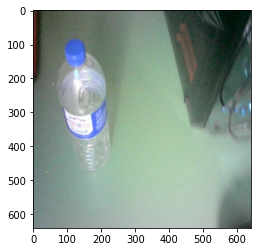

In [23]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame) #pass frame to models to get results
    
    cv2.imshow('YOLO', np.squeeze(results.render())) #update results to cv2
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()